# Logistic Regression - Comparison With Other Models


In this notebook, we compare the Logistic Regression classifier model with two other classifier models: K-nearest Neighbors & Naive Bayes classifier.

In particular, we will investigate the following three learning models for classification.

- Instance or Memory-Based Learning (k-Nearest Neighbors)
- Model-Based Learning
      -- Generative Approach (Naive Bayes classifier)
      -- Discriminative Approach (Logistic Regression)


For this study, we will use Scikit-Learn's LogisticRegression object that uses the Gradient Descent algorithm. Since our dataset is small, Gradient Descent-based Logistic Regression will not require longer training time. However, for larger datasets, we should use the Stochastic Gradient Descent implementation of Logistic Regression.

# Dataset


We will use the Cleveland Heart Disease dataset taken from the UCI repository. The goal is to classify whether a person is suffering from a heart disease or not. In other words, it's a binary classification problem.

#### Data Source:
https://www.kaggle.com/ronitf/heart-disease-uci#heart.csv
https://archive.ics.uci.edu/ml/datasets/Heart+Disease



The dataset consists of 303 individuals data. It contains 76 features, but all published experiments refer to using a subset of 14 of them.


The 14 features (columns) are described below. Note that the last column is the target (binary).


1. Age : displays the age of the individual.

2. Sex : displays the gender of the individual using the following format:

        1 = male
        0 = female
3. Chest-pain type : displays the type of chest pain experienced by the individual using the following format 

        1 = typical angina
        2 = atypical angina
        3 = non — anginal pain
        4 = asymptotic

4. Resting Blood Pressure : displays the resting blood pressure value of an individual in mmHg (unit)

5. Serum Cholestrol : displays the serum cholestrol in mg/dl (unit)

6. Fasting Blood Sugar : compares the fasting blood sugar value of an individual with 120mg/dl.

        If fasting blood sugar > 120mg/dl then : 1 (true)
        else : 0 (false)

7. Resting ECG : displays resting electrocardiographic results

        0 = normal
        1 = having ST-T wave abnormality
        2 = left ventricular hyperthrophy

8. Max heart rate achieved : displays the max heart rate achieved by an individual.

9. Exercise induced angina :

        1 = yes
        0 = no

10. ST depression induced by exercise relative to rest : displays the value which is integer or float.

11. Peak exercise ST segment :
 
        1 = upsloping
        2 = flat
        3 = downsloping

12. Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

13. Thal : displays the thalassemia :

        3 = normal
        6 = fixed defect
        7 = reversible defect

14. Target : Diagnosis of heart disease - Displays whether the individual is suffering from heart disease or not:
    
        0 = absence
        1, 2, 3, 4 = present.

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

/var/folders/zd/2ty0m0yn1jzc2zjgq1154kkxxmbbr2/T/ipykernel_1221/3630200973.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Load Data

Load the data using Pandas. 

Pandas' read_csv() method will load the data as a Pandas DataFrame object.

In [2]:
df = pd.read_csv('/Users/mhasan2/Library/CloudStorage/OneDrive-UniversityofNebraska-Lincoln/Datasets/HeartDiseaseCleveland.csv')


## Quick Check of the Data

Let’s take a look at the top five rows using the DataFrame’s head() method.

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Description of the Data

DataFrame’s info() method is useful to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Dimension of the Data

In [5]:
print("Dimension of the data: ", df.shape)

no_of_rows = df.shape[0]
no_of_columns = df.shape[1]

print("No. of Rows: %d" % no_of_rows)
print("No. of Columns: %d" % no_of_columns)

Dimension of the data:  (303, 14)
No. of Rows: 303
No. of Columns: 14


## Visualization of the Data

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

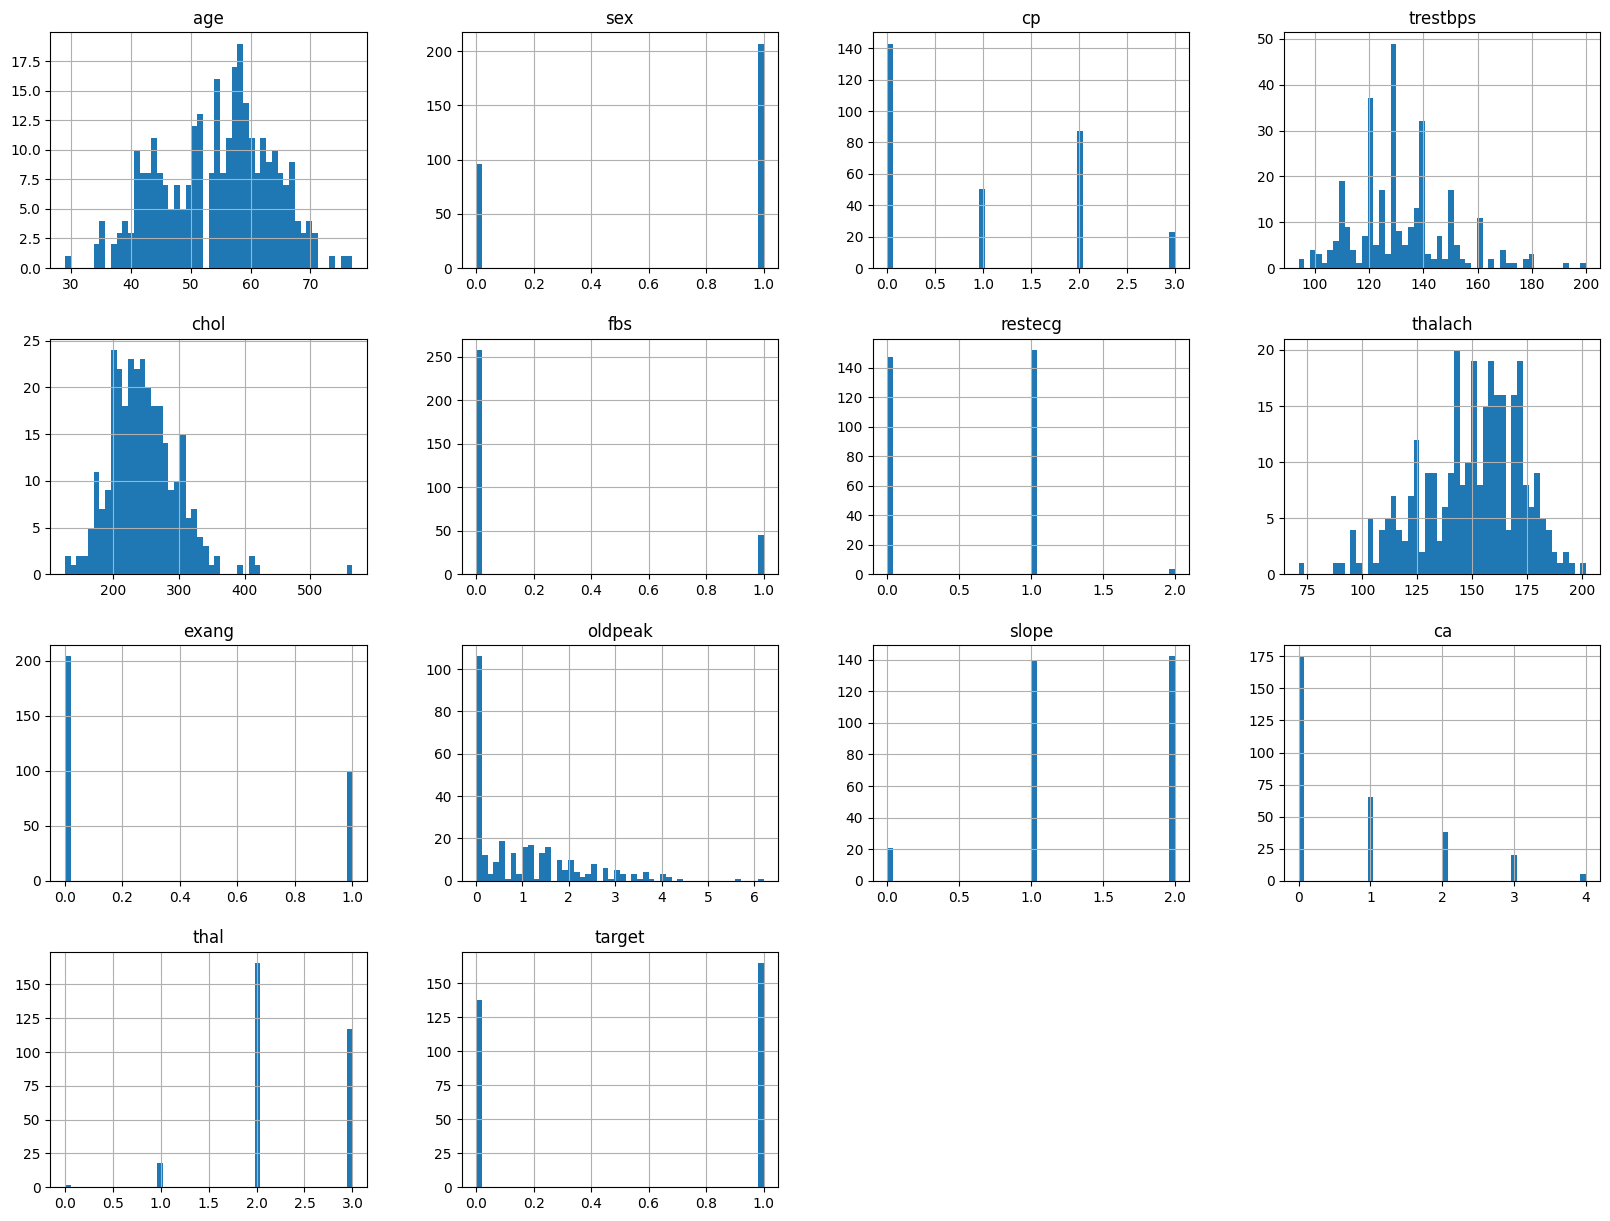

In [6]:
df.hist(bins=50, figsize=(20,15)) 

## Create a Separate Feature Set (Data Matrix X) and Target (1D Array y)

Create a data matrix (X) that contains all features and a 1D target array (y) containing the target.

First, we create separate data frame objects for X and y. Then, we convert the data frame objects into arrays.

In [7]:
# Create separate data frame objects for X (features) and y (target)
y = df['target'] 
X = df.drop(columns='target')  


X = np.asarray(X) # Data Matrix containing all features excluding the target
y = np.asarray(y) # 1D target array


print("Data Matrix (X) Shape: ", X.shape)
print("Label Array (y) Shape: ", y.shape)

print("\nData Matrix (X) Type: ", X.dtype)
print("Label Array (y) Type: ", y.dtype)

Data Matrix (X) Shape:  (303, 13)
Label Array (y) Shape:  (303,)

Data Matrix (X) Type:  float64
Label Array (y) Type:  int64


## Split Data Into Training and Test Sets

In [8]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print(X_train.shape)
print(X_test.shape)

(242, 13)
(61, 13)


## Scale the Data Using Standardization Technique

Note that the k-Nearest Neighbors (k-NN) and Gradient Descent optimization algorithms (such as Logistic Regression) are influenced by the scale of the data. 

Thus, we must standardize the data before applying this learning algorithm.

In [9]:
scaler = StandardScaler()

# Fit on the training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 1. Logistic Regression



## Model Selection for Logistic Regression: Hyperparameter Tuning

First, we need to find the optimal hyperparameters via Gridsearch.

In [10]:
%%time

warnings.filterwarnings('ignore')

param_grid_logreg = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
                 'tol': [1e-3, 1e-4, 1e-5], 'max_iter':[100, 500, 1000],
                 'C': [0.001, 0.01, 0.1, 0.5]}

lg_reg = LogisticRegression()

lg_reg_cv = GridSearchCV(lg_reg, param_grid_logreg, scoring='f1', cv=3, verbose=1, n_jobs=-1)
lg_reg_cv.fit(X_train, y_train)

params_optimal_logreg = lg_reg_cv.best_params_

print("Best Score (accuracy): %f" % lg_reg_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_logreg)
print("\n")

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best Score (accuracy): 0.876624
Optimal Hyperparameter Values:  {'C': 0.1, 'max_iter': 100, 'solver': 'newton-cg', 'tol': 0.001}


CPU times: user 85.9 ms, sys: 104 ms, total: 190 ms
Wall time: 920 ms


## 1. Train the Optimal Logistic Regression Classifier

In [11]:
log_reg = LogisticRegression(**params_optimal_logreg)

log_reg.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='newton-cg', tol=0.001)

## 1. Evaluate the Optimal Logistic Regression Classifier on Test Data

In [12]:
print("No. of Iterations:", log_reg.n_iter_ )

y_test_predicted = log_reg.predict(X_test)
#print(y_test_predict)

accuracy_score_test_logreg = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", accuracy_score_test_logreg)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

No. of Iterations: [8]

Test Accuracy:  0.7540983606557377

Test Confusion Matrix:
[[18 10]
 [ 5 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.64      0.71        28
           1       0.74      0.85      0.79        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



# 2. k-Nearest Neighbors

## Model Selection for k-NN: Hyperparameter Tuning

First, we need to find the optimal hyperparameters via Gridsearch.

In [13]:
%%time

param_grid_knn = {'n_neighbors': np.arange(1, 20), 'p': [1, 2, 10, 50, 100, 500, 1000], 
                  'weights': ["uniform", "distance"]}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid_knn, scoring='f1', cv=3, verbose=1, n_jobs=-1)
knn_cv.fit(X_train, y_train)

params_optimal_knn = knn_cv.best_params_

print("Best Score: %f" % knn_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn)
print("\n")

Fitting 3 folds for each of 266 candidates, totalling 798 fits
Best Score: 0.876533
Optimal Hyperparameter Values:  {'n_neighbors': 14, 'p': 2, 'weights': 'distance'}


CPU times: user 109 ms, sys: 20 ms, total: 129 ms
Wall time: 220 ms


## 2. Train the Optimal k-NN Classifier

In [14]:
%%time

knn_clf = KNeighborsClassifier(**params_optimal_knn)

knn_clf.fit(X_train, y_train)

CPU times: user 1.86 ms, sys: 703 µs, total: 2.56 ms
Wall time: 2.23 ms


KNeighborsClassifier(n_neighbors=14, weights='distance')

## 2. Evaluate the Optimal k-NN Classifier on Test Data

In [15]:
y_test_predicted = knn_clf.predict(X_test)
#print(y_test_predict)

accuracy_score_test_knn = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", accuracy_score_test_knn)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Test Accuracy:  0.7540983606557377

Test Confusion Matrix:
[[19  9]
 [ 6 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        28
           1       0.75      0.82      0.78        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



# 3. Gaussian Naive Bayes Classifier

Since the feature values are real numbers, we will use the Gaussian Naive Bayes for classification.



## Model Selection for Gaussian NB: Hyperparameter Tuning

First, we need to find the optimal hyperparameters via Gridsearch.

In [16]:
%%time

param_grid_gnb = {'var_smoothing': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 2.0]}

gaussianNB = GaussianNB()

gaussianNB_cv = GridSearchCV(gaussianNB, param_grid_gnb, scoring='f1', cv=3, verbose=1, n_jobs=-1)
gaussianNB_cv.fit(X_train, y_train)

params_optimal_gnb = gaussianNB_cv.best_params_

print("Best Score: %f" % gaussianNB_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_gnb)
print("\n")

Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best Score: 0.867021
Optimal Hyperparameter Values:  {'var_smoothing': 2.0}


CPU times: user 14.6 ms, sys: 5.69 ms, total: 20.3 ms
Wall time: 32.5 ms


## 3. Train the Optimal Gaussian NB Classifier

In [17]:
gaussianNB_clf = GaussianNB(**params_optimal_gnb)

gaussianNB_clf.fit(X_train, y_train)  

GaussianNB(var_smoothing=2.0)

## 3. Evaluate the Optimal Gaussian NB Classifier on Test Data

In [18]:
y_test_predicted = gaussianNB_clf.predict(X_test)


accuracy_score_test_gnb = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", accuracy_score_test_gnb)

print("\nText Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Test Accuracy:  0.7213114754098361

Text Confusion Matrix:
[[15 13]
 [ 4 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.54      0.64        28
           1       0.69      0.88      0.77        33

    accuracy                           0.72        61
   macro avg       0.74      0.71      0.71        61
weighted avg       0.74      0.72      0.71        61



## Comparion Of Test Accuracy

In [19]:
print("Logistic Regression Test Accuracy: ", accuracy_score_test_logreg)
print("k-NN Test Accuracy: ", accuracy_score_test_knn)
print("Gaussian NB Test Accuracy: ", accuracy_score_test_gnb)

Logistic Regression Test Accuracy:  0.7540983606557377
KNN Test Accuracy:  0.7540983606557377
Gaussian NB Test Accuracy:  0.7213114754098361


# Comparative Understanding of Three Classifiers

### Naive Bayes Classifier
- No model selection (hyperparameter tuning) except the Bayesian (smoothing) parameter. Thus the we can immediately start training the model.
- Works well even if data is small.
- Scale well with high-dimensional features, hence we don't have to worry about the curse of dimensionality.
- Since it's not an optimization technique, we don't have to search appropriate learning rate, generate learning curves to detect underfitting/overfitting, regularize via early stopping, etc.
- Life is good with the NB classifier!
- Can directly perform multi-class classification. We don't need to train multiple binary classifiers.


### K-Nearest Neighbors
- No learning!
- There is no need to compute class probabilities.
- Suffers from the curse of dimensionality.
- Training time is painfully longer for large dataset and high-dimensional features.
- Can directly perform multi-class classification. We don't need to train multiple binary classifiers.


### Logistic Regression
- It's mainly a binary classifier.
- For nonlinear dataset we need to augment the features.
- For multi-class classification we need to train multiple binary classifiers when we use the one-versus-all (OvA) strategy. However, the Softmax regression is able to directly perform multi-class classification.
- No closed form solution!
- Batch Gradient Descent takes longer time on larger dataset.
- Training gets slower if the learning rate is not chosen appropriately.
- For faster convergence we need to use 2nd order derivative of the cost function in the Gradient Descent algorithm.
- Stochastic Gradient Descent requires careful hyperparparameter tuning.



## Logistic Regression vs Naive Bayes

- Logistic Regression makes no assumption about P(X|Y) in learning, while the Naive Bayes does!
- They optimize different functions and obtain different solutions.

In general, NB and LR make different assumptions
- NB: Features are independent given class: P(X|Y) 
- LR: Defines the functional form of P(Y|X), but no assumptionon about the features P(X|Y)

Convergence rates
- GNB (usually) needs less data
- LR (usually) gets in the limit

With asymptotic assumption, when model correctly
- GNB (with class independent variances) and LR produce identical classifiers 
- LR is less biased, does not assume conditional independence, therefore LR is expected to outperform GNB